In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import classification_report


In [ ]:
data = pd.read_csv("mushrooms.csv")

In [ ]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
classes = data['class'].value_counts()

classes

,count
class,
e,4208
p,3916


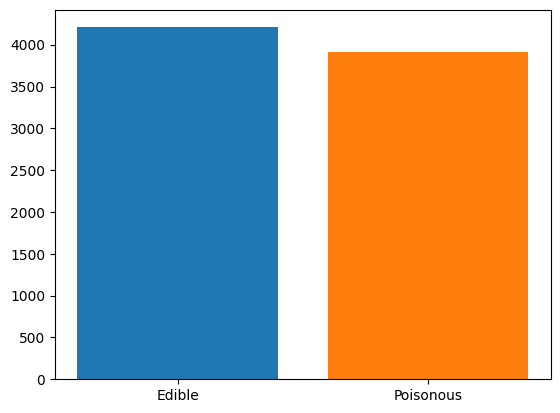

In [ ]:
plt.bar('Edible',classes['e'])
plt.bar('Poisonous',classes['p'])
plt.show()

In [ ]:
X = data.loc[:, ['cap-shape','cap-color','ring-number','ring-type']]
Y = data.loc[:, 'class']

In [ ]:
encoder = LabelEncoder()

for i in X.columns:
    X[i] = encoder.fit_transform(X[i])


Y = encoder.fit_transform(Y)

In [ ]:
X

,cap-shape,cap-color,ring-number,ring-type
0,5,4,1,4
1,5,9,1,4
2,0,8,1,4
3,5,8,1,4
4,5,3,1,0
...,...,...,...,...
8119,3,4,1,4
8120,5,4,1,4
8121,2,4,1,4
8122,3,4,1,0


In [ ]:
Y

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [ ]:
logistic_classifier_model = LogisticRegression()
ridge_classifier_model = RidgeClassifier()
decision_tree_model = DecisionTreeClassifier()
naive_bayes_model = GaussianNB()
neural_network_model = MLPClassifier()

In [ ]:
logistic_classifier_model.fit(X_train, Y_train)
ridge_classifier_model.fit(X_train, Y_train)
decision_tree_model.fit(X_train, Y_train)
naive_bayes_model.fit(X_train, Y_train)
neural_network_model.fit(X_train, Y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [ ]:
logistic_pred = logistic_classifier_model.predict(X_test)
ridge_pred = ridge_classifier_model.predict(X_test)
tree_pred = decision_tree_model.predict(X_test)
naive_bayes_pred = naive_bayes_model.predict(X_test)
neural_network_pred = neural_network_model.predict(X_test)

In [ ]:
logistic_report = classification_report(Y_test, logistic_pred)
ridge_report = classification_report(Y_test, ridge_pred)
tree_report = classification_report(Y_test, tree_pred)
naive_bayes_report = classification_report(Y_test, naive_bayes_pred)
neural_network_report = classification_report(Y_test, neural_network_pred)

In [ ]:
print('******* Logistic Regression *******')
print(logistic_report)

print('******* ridge Regression *******')
print(ridge_report)

print('******* Decision Tree *******')
print(tree_report)

print('******* Naive Bayes *******')
print(naive_bayes_report)

print('******* Neural Network *******')
print(neural_network_report)

******* Logistic Regression *******
              precision    recall  f1-score   support

           0       0.78      0.79      0.78      1215
           1       0.79      0.78      0.78      1223

    accuracy                           0.78      2438
   macro avg       0.78      0.78      0.78      2438
weighted avg       0.78      0.78      0.78      2438

******* ridge Regression *******
              precision    recall  f1-score   support

           0       0.78      0.79      0.78      1215
           1       0.79      0.78      0.78      1223

    accuracy                           0.78      2438
   macro avg       0.78      0.78      0.78      2438
weighted avg       0.78      0.78      0.78      2438

******* Decision Tree *******
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1215
           1       0.90      0.92      0.91      1223

    accuracy                           0.91      2438
   macro avg       0.91      

In [ ]:
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, Y_train)
random_forest_pred = random_forest_model.predict(X_test)

In [ ]:
random_forest_report = classification_report(Y_test, random_forest_pred)

print(random_forest_report)

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1215
           1       0.90      0.92      0.91      1223

    accuracy                           0.91      2438
   macro avg       0.91      0.91      0.91      2438
weighted avg       0.91      0.91      0.91      2438

